# Step 1. Sentence input

## Pre-processing and tokenisation

In [1]:
from lambeq import SpacyTokeniser

tokeniser = SpacyTokeniser()
sentence = "This sentence isn't worth £100 (or is it?)."
tokens = tokeniser.tokenise_sentence(sentence)
tokens

['This',
 'sentence',
 'is',
 "n't",
 'worth',
 '£',
 '100',
 '(',
 'or',
 'is',
 'it',
 '?',
 ')',
 '.']

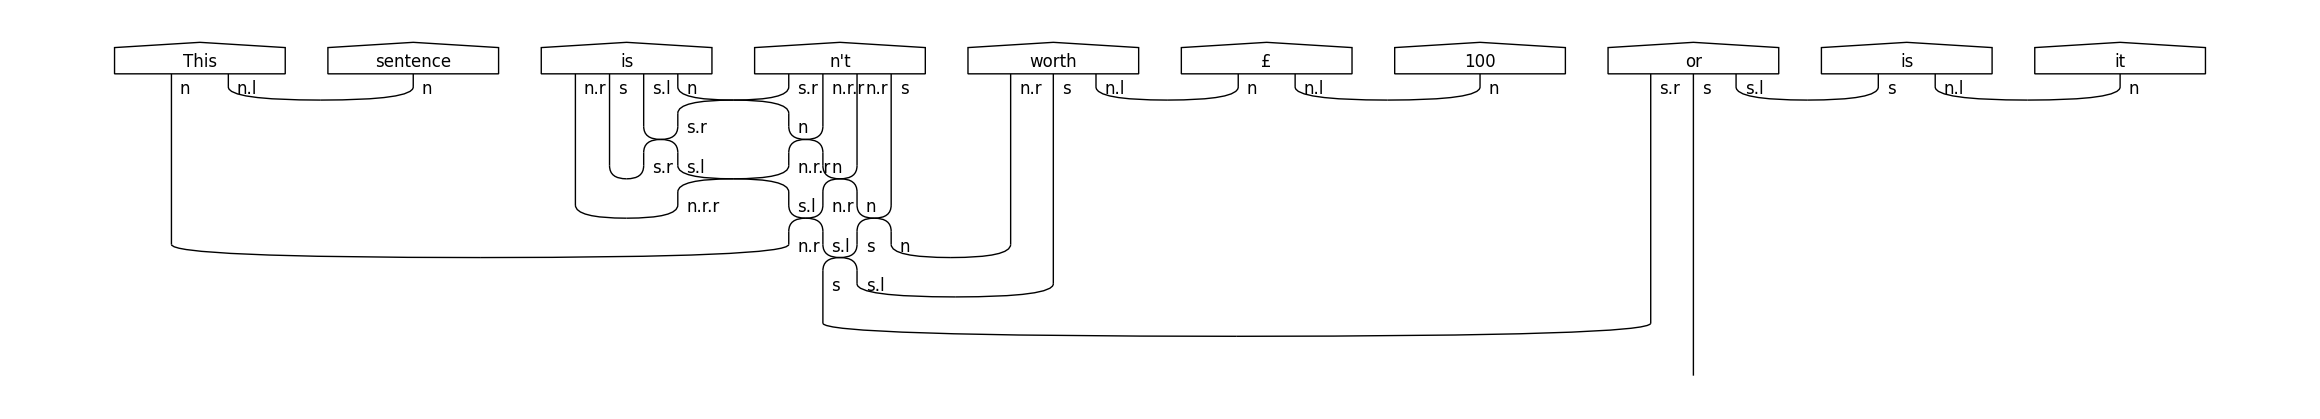

In [2]:
from lambeq import BobcatParser

parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(tokens, tokenised=True)

diagram.draw(figsize=(23,4), fontsize=12)

In [3]:
sentences = ["This is a sentence.", "This is (another) sentence!"]

tok_sentences = tokeniser.tokenise_sentences(sentences)
tok_sentences

[['This', 'is', 'a', 'sentence', '.'],
 ['This', 'is', '(', 'another', ')', 'sentence', '!']]

In [4]:
text = "I love pizza. It is my favorite food. I could eat it every day!"
sentences = tokeniser.split_sentences(text)
sentences

['I love pizza.', 'It is my favorite food.', 'I could eat it every day!']

## Syntax-based model: DisCoCat

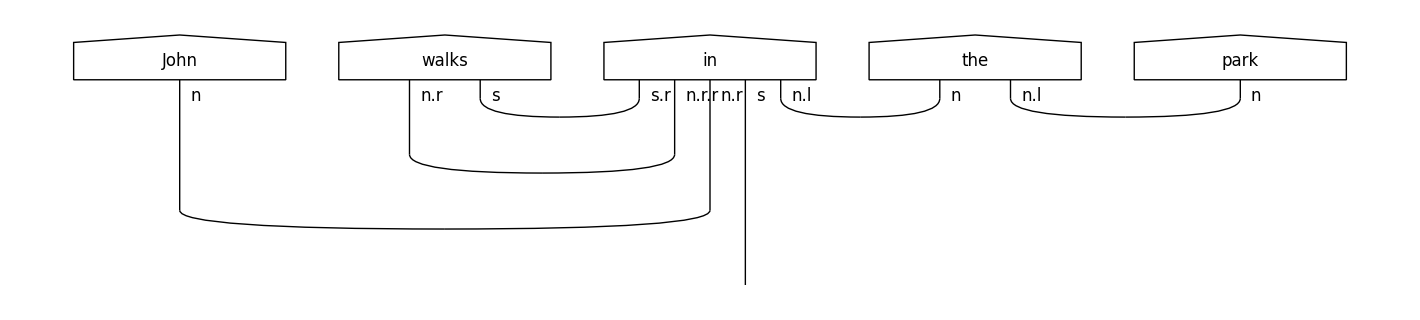

In [5]:
from lambeq import BobcatParser

sentence = 'John walks in the park'

# Parse the sentence and convert it into a string diagram
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram(sentence)

diagram.draw(figsize=(14,3), fontsize=12)

## Bag-of-words: Spiders reader

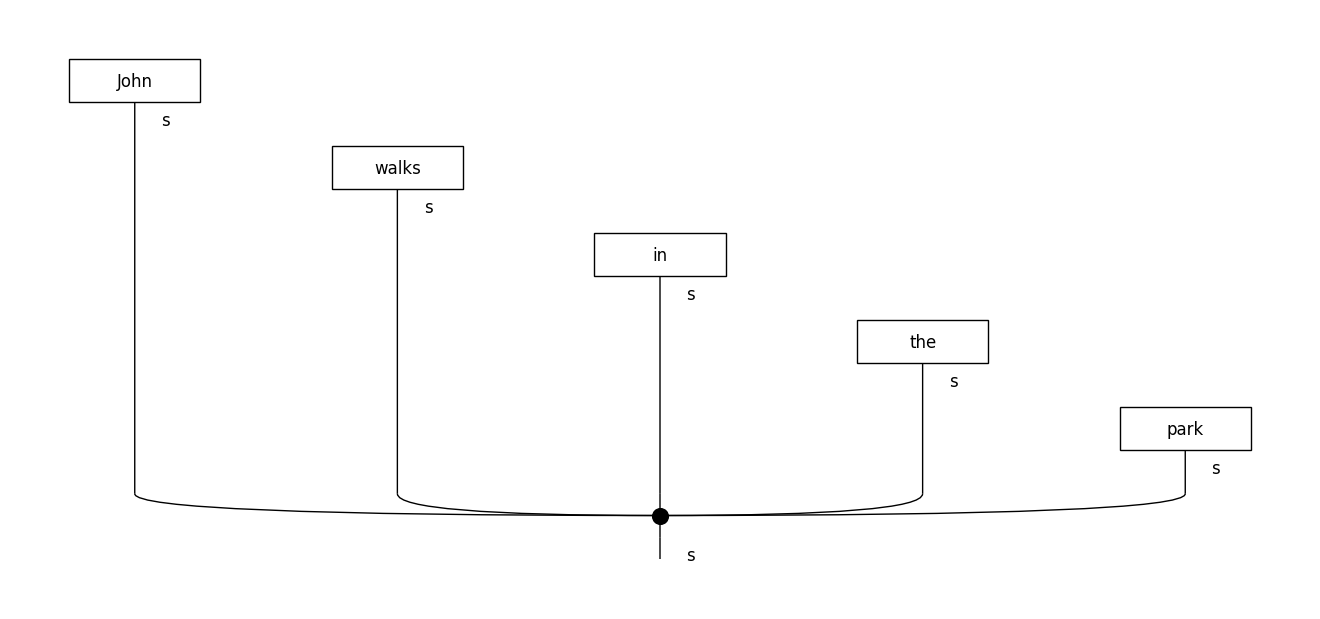

In [6]:
from lambeq import spiders_reader

# Create string diagrams based on spiders reader
spiders_diagram = spiders_reader.sentence2diagram(sentence)

# Not a pregroup diagram, we can't use grammar.draw()
spiders_diagram.draw(figsize=(13,6), fontsize=12)

## Word-sequence models: Cups and stairs readers

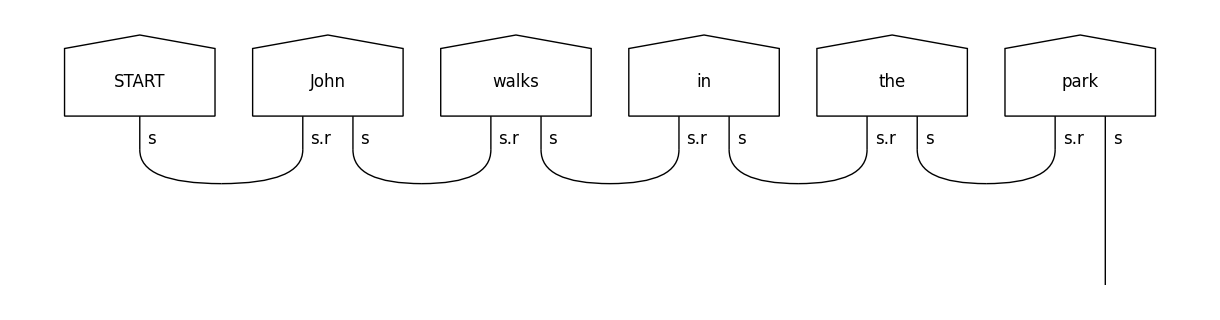

In [7]:
from lambeq import cups_reader

# Create string diagrams based on cups reader
cups_diagram = cups_reader.sentence2diagram(sentence)

cups_diagram.draw(figsize=(12,3), fontsize=12)

Note the use of a `START` symbol in the beginning of the sentence, represented as an order-1 tensor (a vector). This ensures that the final result of the computation (that is, the representation of the sentence) will be again a tensor of order 1.

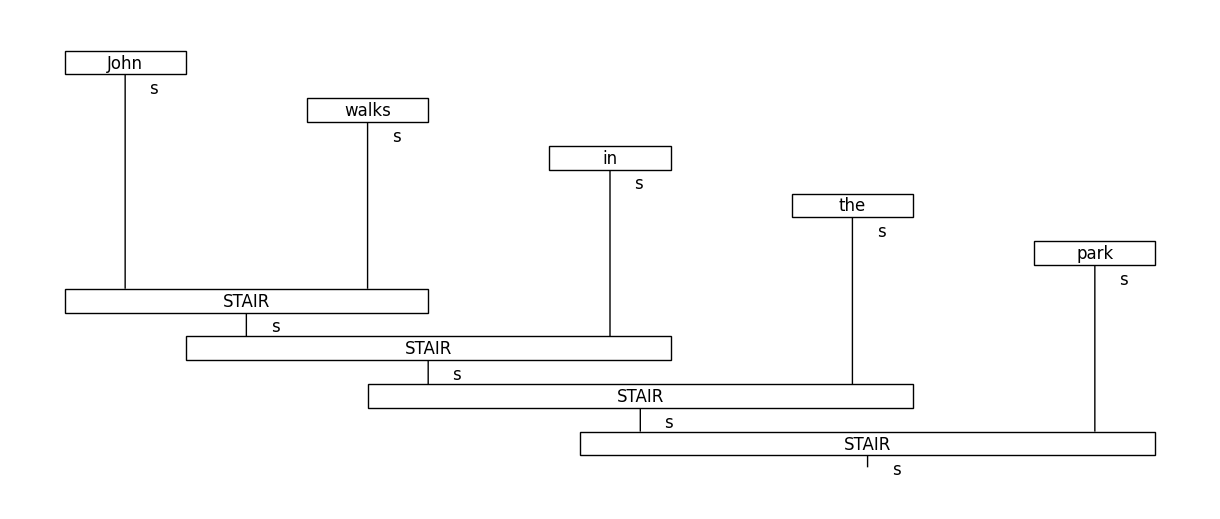

In [8]:
from lambeq import stairs_reader

stairs_diagram = stairs_reader.sentence2diagram(sentence)
stairs_diagram.draw(figsize=(12,5), fontsize=12)

## Tree readers

<center>
<img src="../_static/images/ccg-diagram.png" width=350>
</center>

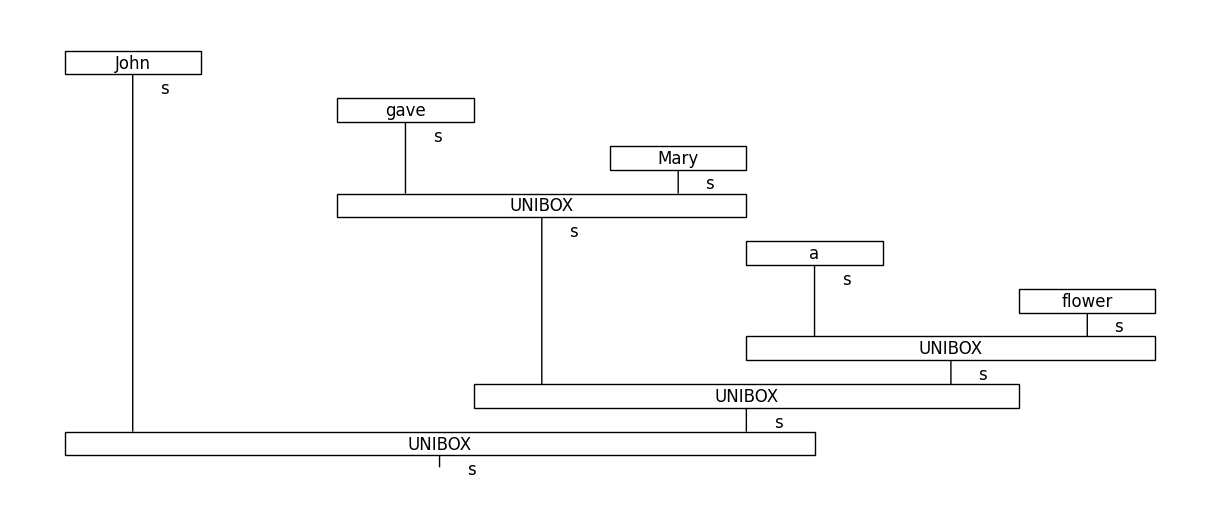

In [9]:
from lambeq import TreeReader

reader = TreeReader()
sentence = "John gave Mary a flower"

tree_diagram = reader.sentence2diagram(sentence)
tree_diagram.draw(figsize=(12,5), fontsize=12)

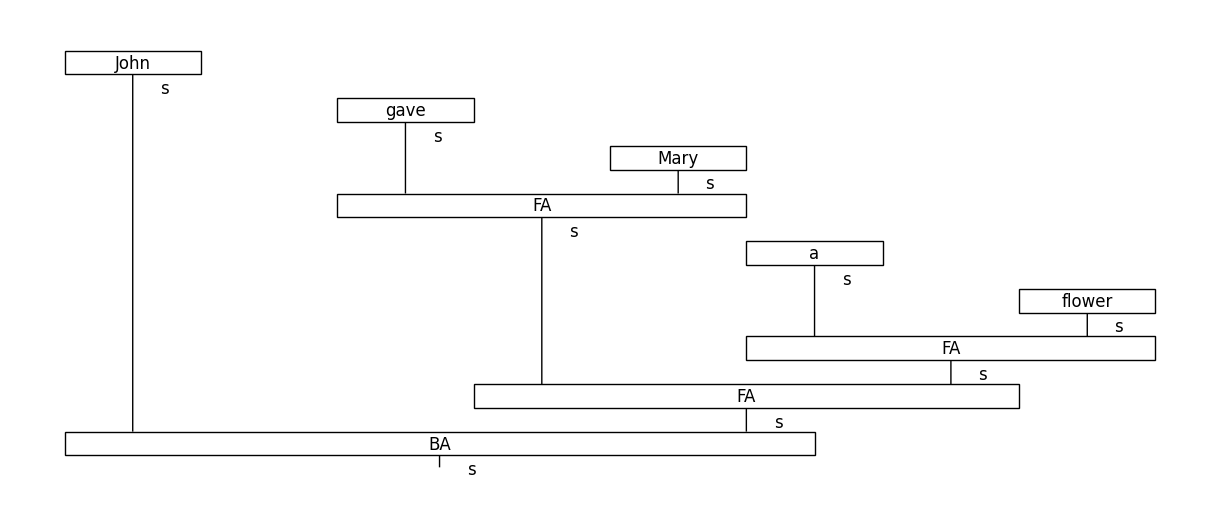

In [10]:
from lambeq import TreeReader, TreeReaderMode

reader = TreeReader(mode=TreeReaderMode.RULE_ONLY)
sentence = "John gave Mary a flower"

tree_diagram = reader.sentence2diagram(sentence)
tree_diagram.draw(figsize=(12,5), fontsize=12)

In the above, each unique CCG rule gets its own box: FA boxes correspond to forward application, and BA boxes to backward application. For certain tasks, making the composition box rule-specific might lead to better generalisation and overall performance.